<a href="https://colab.research.google.com/github/HannaCarla/CNN-for-EEG-Classification/blob/main/Imbalanced_MixedModel_Treino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mne

In [3]:
import mne
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling2D, Flatten, Dense



In [4]:
iir_params=dict(order=2, ftype='butter')

In [5]:
dataframes = []

## Processamento dos dados

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
#read all file
all_files_path=glob('/content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/*.edf')
print((all_files_path))

['/content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb01_26.edf', '/content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb05_17.edf', '/content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb11_99.edf', '/content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb08_21.edf', '/content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb03_03.edf']


In [8]:
def preprocessing(file_path):
    datax=mne.io.read_raw_edf(file_path,preload=True)
    datax.set_eeg_reference()
    datax.filter(1., None)
    #datax.apply_function (lambda x: x * 1e-6)
    datax.pick_channels(['F3-C3','C3-P3', 'F4-C4','C4-P4' ])
    datax.filter(None, h_freq=40.0, method='iir', iir_params=iir_params, verbose=True)
    epochs=mne.make_fixed_length_epochs(datax,duration=4)
    epochs=epochs.to_data_frame()
    return epochs

In [9]:
data=[preprocessing(subject) for subject in all_files_path]

Extracting EDF parameters from /content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb01_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-8-563db69d2c10>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax=mne.io.read_raw_edf(file_path,preload=True)


Reading 0 ... 595199  =      0.000 ...  2324.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB

Not setting metadata
581 matching events found
No baseline correction applied


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s finished


0 projection items activated
Using data from preloaded Raw for 581 events and 1024 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb05_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-8-563db69d2c10>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax=mne.io.read_raw_edf(file_path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.5s finished


Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 900 events and 1024 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb11_99.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 731903  =      0.000 ...  2858.996 secs...


<ipython-input-8-563db69d2c10>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8', '-'}. Applying running numbers for duplicates.
  datax=mne.io.read_raw_edf(file_path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB



[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.3s finished


Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 714 events and 1024 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb08_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-8-563db69d2c10>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax=mne.io.read_raw_edf(file_path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 900 events and 1024 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /content/drive/MyDrive/Hanna/Mix_Pacientes/imb_mixed_model_files/chb03_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-8-563db69d2c10>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax=mne.io.read_raw_edf(file_path,preload=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

IIR filter parameters


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    2.9s finished


---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB

Not setting metadata
900 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 900 events and 1024 original time points ...
0 bad epochs dropped


In [10]:
df1 = data[0]
df2 = data[1]
df3 = data[2]
df4 = data[3]
df5 = data[4]


In [11]:
dataframes = [df1, df2, df3, df4, df5]

In [12]:
#Função organizar dataframes
for i, df in enumerate (dataframes):
  df['condition'] = 0
  df['registro'] = i + 1


In [13]:
all_df=pd.concat([df1, df2, df3, df4, df5])

In [14]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090880 entries, 0 to 921599
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       float64
 1   condition  int64  
 2   epoch      int64  
 3   F3-C3      float64
 4   C3-P3      float64
 5   F4-C4      float64
 6   C4-P4      float64
 7   registro   int64  
dtypes: float64(5), int64(3)
memory usage: 280.9 MB


In [15]:
# reindex the columns
all_df = all_df.reindex(columns=['time', 'condition', 'epoch', 'registro', 'F3-C3', 'C3-P3', 'F4-C4', 'C4-P4'])

print(all_df)

            time  condition  epoch  registro       F3-C3       C3-P3  \
0       0.000000          0      0         1   -0.002272    0.002672   
1       0.003906          0      0         1  142.880112 -156.946778   
2       0.007812          0      0         1  232.267538 -255.092702   
3       0.011719          0      0         1  261.047673 -286.613872   
4       0.015625          0      0         1  256.817341 -281.904019   
...          ...        ...    ...       ...         ...         ...   
921595  3.980469          0    899         5   23.692563    4.540565   
921596  3.984375          0    899         5   17.379465    1.212173   
921597  3.988281          0    899         5   10.106565   -1.499162   
921598  3.992188          0    899         5    4.137607   -1.788148   
921599  3.996094          0    899         5    0.000985   -0.000301   

            F4-C4      C4-P4  
0       -0.002326   0.002243  
1       21.984379   7.698781  
2       35.736252  12.586873  
3       40.

# Labels

In [16]:
def seizureepochs (start_time, duration):
  start_time = start_time  # example seizure start time in seconds
  duration = duration  # example seizure duration in seconds
  sampling_rate = 256  # EEG data sampling rate in Hz
  epoch_len = 4  # epoch length in seconds
  overlap = 0  # epoch overlap in seconds
  epoch_len_samples = epoch_len * sampling_rate  # epoch length in data points
  overlap_samples = overlap * sampling_rate  # epoch overlap in data points
  start_sample = int((start_time - overlap) * sampling_rate)  # calculate starting sample index
  end_sample = int((start_time + duration - overlap) * sampling_rate)  # calculate ending sample index
  start_epoch = int(round(start_sample / epoch_len_samples))  # round to nearest epoch boundary
  end_epoch = int(round(end_sample / epoch_len_samples))  # round to nearest epoch boundary
  seizure_epochs = list(range(start_epoch, end_epoch + 1))  # create list of epochs that correspond to seizure
  return seizure_epochs


Registro chb01_26

In [17]:
registrochb01_26 = seizureepochs(1862, 101)

In [18]:
registrochb01_26

[466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491]

In [19]:
all_df.loc[(all_df['epoch']>=466) & (all_df['epoch']<=491) & (all_df['registro']==1), 'condition']=1

In [20]:
all_df['condition'].value_counts()

0    4064256
1      26624
Name: condition, dtype: int64

Registro chb05_17

In [21]:
Registro_chb05_17 = seizureepochs(2451, 120)

In [22]:
Registro_chb05_17

[613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643]

In [23]:
all_df.loc[(all_df['epoch']>=613) & (all_df['epoch']<643) & (all_df['registro']==2), 'condition']=1

In [24]:
all_df['condition'].value_counts()

0    4033536
1      57344
Name: condition, dtype: int64

Registro Chb11_99

In [25]:
Registro_Chb11_99 = seizureepochs(1454, 752)

In [26]:
Registro_Chb11_99

[364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530

In [27]:
all_df.loc[(all_df['epoch']>=364) & (all_df['epoch']<552) & (all_df['registro']==3), 'condition']=1

In [28]:
all_df['condition'].value_counts()

0    3841024
1     249856
Name: condition, dtype: int64

Registro Chb08_21

In [29]:
Registro_Chb08_21 = seizureepochs(2083, 264)

In [30]:
Registro_Chb08_21

[521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587]

In [31]:
all_df.loc[(all_df['epoch']>=521) & (all_df['epoch']<587) & (all_df['registro']==4), 'condition']=1

In [32]:
all_df['condition'].value_counts()

0    3773440
1     317440
Name: condition, dtype: int64

Registro chb03_03

In [33]:
registrochb03_03 =seizureepochs(432, 69)

In [34]:
registrochb03_03

[108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125]

In [35]:
all_df.loc[(all_df['epoch']>=108) & (all_df['epoch']<=125) & (all_df['registro']==5), 'condition']=1

In [36]:
all_df['condition'].value_counts()

0    3755008
1     335872
Name: condition, dtype: int64

In [37]:
#verificar se as labels foram inseridas
unique_values = np.unique(all_df['condition'])
print(unique_values)


[0 1]


# Reshape to a 3D Tensor

In [38]:
from tqdm import tqdm

In [39]:
def split_array(array, chunk_size):
    rows, cols = array.shape
    num_chunks = rows // chunk_size
    chunks = np.split(array[:num_chunks*chunk_size], num_chunks)
    return chunks

In [40]:
channel_columns_names = all_df.columns[4:]
frame_length = 256

frames = [
    frame for frame in tqdm(split_array(all_df, frame_length))
    if frame['condition'].unique().shape[0] == 1 and frame['epoch'].unique().shape[0] == 1
]

print(f'Generated {len(frames)} frames')

frames_X = np.array([frame[channel_columns_names].values for frame in tqdm(frames) if frame.shape[0] == frame_length])
frames_Y = np.array([frame['condition'].unique()[0] for frame in tqdm(frames) if frame.shape[0] == frame_length])

100%|██████████| 15980/15980 [00:08<00:00, 1904.80it/s]


Generated 15980 frames


100%|██████████| 15980/15980 [00:02<00:00, 6635.64it/s]


Change the labels to categorical

In [41]:
from keras.utils import to_categorical

# transform the condition data to categorical values
num_classes = 2  # number of classes (seizure and non-seizure)
condition_data = to_categorical(frames_Y, num_classes)


# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(frames_X, frames_Y, test_size=0.2, random_state=42)

# split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [42]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)
print('X_val',X_val.shape)
print('y_val', y_val.shape)

X_train (10227, 256, 4)
y_train (10227,)
X_test (3196, 256, 4)
y_test (3196,)
X_val (2557, 256, 4)
y_val (2557,)


In [43]:
pd.DataFrame([pd.Series(data).value_counts(normalize=True) for data in (y_train, y_test, y_val)], index=['Train', 'Test', 'Val'])

,0,1
Train,0.918256,0.081744
Test,0.915832,0.084168
Val,0.919046,0.080954


# Deep Learning

In [44]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense

# Define the input shape
# num_epochs = 900
# num_channels = 4
# num_samples = 1024

input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Reshape the input data
# X_train_reshaped = X_train.reshape(-1, num_channels, 1)
# X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

X_train_reshaped = X_train.reshape(*X_train.shape, 1)
X_val_reshaped = X_val.reshape(*X_val.shape, 1)
X_test_reshaped = X_test.reshape(*X_test.shape, 1)

In [45]:
X_train_reshaped.shape

(10227, 256, 4, 1)

In [46]:
def EEGNet2(input_shape, num_classes):

    input_layer = Input(shape=input_shape)

    # First Conv2D layer
    conv1 = Conv2D(filters=16, kernel_size=(64, 1), strides=(1, 1), padding='same', data_format='channels_last')(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv1 = DepthwiseConv2D(kernel_size=(2, 1), strides=(2, 2), depth_multiplier=1, padding='valid')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('elu')(conv1)

    # Second Conv2D layer
    conv2 = Conv2D(filters=32, kernel_size=(32, 1), strides=(1, 1), padding='same', data_format='channels_last')(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = DepthwiseConv2D(kernel_size=(2, 1), strides=(2, 2), depth_multiplier=2, padding='valid')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('elu')(conv2)

    # Third Conv2D layer
    conv3 = Conv2D(filters=32, kernel_size=(16, 1), strides=(1, 1), padding='same', data_format='channels_last')(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = DepthwiseConv2D(kernel_size=(2, 1), strides=(2, 2), depth_multiplier=4, padding='valid')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('elu')(conv3)

    # Average Pooling layer
    avg_pool = AveragePooling2D(pool_size=(4, 1), strides=(1, 1))(conv3)

    # Flatten layer
    flatten = Flatten()(avg_pool)

    # Dense layer
    dense = Dense(units=num_classes, activation='sigmoid')(flatten)

    # Create the model
    model = Model(inputs=input_layer, outputs=dense)

    return model


In [47]:
# model = EEGNet(input_shape=(900, 4, 1024, 1), num_classes=1)
model = EEGNet2(input_shape=(256, 4, 1), num_classes=1)
history = model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 4, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 4, 16)        1040      
                                                                 
 batch_normalization (BatchN  (None, 256, 4, 16)       64        
 ormalization)                                                   
                                                                 
 depthwise_conv2d (Depthwise  (None, 128, 2, 16)       48        
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 128, 2, 16)       64        
 hNormalization)                                                 
                                                             

DL+KFold

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_recall_fscore_support

In [49]:
# Calculate class weights
#class_weight = {0: 1, 1: 20}  # Define the class weights manually

In [50]:
cnn_accu_stratified_nm = []
cnn_precision_0 = []
cnn_precision_1 = []
cnn_recall_0 = []
cnn_recall_1 = []
cnn_f1_0 = []
cnn_f1_1 = []
models = []
fold_num = 1

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in skf.split(X_train_reshaped, y_train):

    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # model = EEGNet(input_shape=(900, 4, 1024, 1), num_classes=1)
    model = EEGNet2(input_shape=(256, 4, 1), num_classes=1)
    history = model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)
    y_pred_bin = (y_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_val_fold, y_pred_bin)
    precision, recall, f1, _ = precision_recall_fscore_support(y_val_fold, y_pred_bin, average=None)

    cnn_accu_stratified_nm.append(accuracy)
    cnn_precision_0.append(precision[0])
    cnn_precision_1.append(precision[1])
    cnn_recall_0.append(recall[0])
    cnn_recall_1.append(recall[1])
    cnn_f1_0.append(f1[0])
    cnn_f1_1.append(f1[1])
    models.append(model)

    print(f"Fold {fold_num}: Accuracy={accuracy:.4f}, Precision (class 0)={precision[0]:.4f}, Precision (class 1)={precision[1]:.4f}, Recall (class 0)={recall[0]:.4f}, Recall (class 1)={recall[1]:.4f}, F1-score (class 0)={f1[0]:.4f}, F1-score (class 1)={f1[1]:.4f}")
    fold_num += 1

print('Maximum Accuracy:', max(cnn_accu_stratified_nm))
print('Minimum Accuracy:', min(cnn_accu_stratified_nm))
print('Overall Accuracy:', np.mean(cnn_accu_stratified_nm))
print('Overall Precision (class 0):', np.mean(cnn_precision_0))
print('Overall Precision (class 1):', np.mean(cnn_precision_1))
print('Overall Recall (class 0):', np.mean(cnn_recall_0))
print('Overall Recall (class 1):', np.mean(cnn_recall_1))
print('Overall F1-score (class 0):', np.mean(cnn_f1_0))
print('Overall F1-score (class 1):', np.mean(cnn_f1_1))


32/32 [==============================] - 0s 5ms/step
Fold 1: Accuracy=0.9286, Precision (class 0)=0.9296, Precision (class 1)=0.8571, Recall (class 0)=0.9979, Recall (class 1)=0.1446, F1-score (class 0)=0.9625, F1-score (class 1)=0.2474
32/32 [==============================] - 0s 2ms/step
Fold 2: Accuracy=0.9365, Precision (class 0)=0.9388, Precision (class 1)=0.8519, Recall (class 0)=0.9957, Recall (class 1)=0.2738, F1-score (class 0)=0.9664, F1-score (class 1)=0.4144
32/32 [==============================] - 0s 2ms/step
Fold 3: Accuracy=0.9277, Precision (class 0)=0.9278, Precision (class 1)=0.9167, Recall (class 0)=0.9989, Recall (class 1)=0.1310, F1-score (class 0)=0.9621, F1-score (class 1)=0.2292
32/32 [==============================] - 0s 2ms/step
Fold 4: Accuracy=0.9345, Precision (class 0)=0.9334, Precision (class 1)=1.0000, Recall (class 0)=1.0000, Recall (class 1)=0.2024, F1-score (class 0)=0.9656, F1-score (class 1)=0.3366
32/32 [==============================] - 0s 2ms/step

In [51]:
model_fold_01=models[0]
model_fold_02=models[1]
model_fold_03=models[2]
model_fold_04=models[3]
model_fold_05=models[4]
model_fold_06=models[5]
model_fold_07=models[6]
model_fold_08=models[7]
model_fold_09=models[8]
model_fold_10=models[9]

In [52]:
# Obtain predictions on the test data
y_pred_test = model_fold_04.predict(X_test_reshaped)
y_pred_test_bin = (y_pred_test > 0.5).astype(int)

# Evaluate performance metrics on the test data
accuracy_test = accuracy_score(y_test, y_pred_test_bin)
precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(y_test, y_pred_test_bin, average=None)

print(f"Test set: Accuracy={accuracy_test:.4f}, Precision (class 0)={precision_test[0]:.4f}, Precision (class 1)={precision_test[1]:.4f}, Recall (class 0)={recall_test[0]:.4f}, Recall (class 1)={recall_test[1]:.4f}, F1-score (class 0)={f1_test[0]:.4f}, F1-score (class 1)={f1_test[1]:.4f}")


100/100 [==============================] - 1s 11ms/step
Test set: Accuracy=0.9287, Precision (class 0)=0.9291, Precision (class 1)=0.9020, Recall (class 0)=0.9983, Recall (class 1)=0.1710, F1-score (class 0)=0.9625, F1-score (class 1)=0.2875


In [57]:
accuracy_score(y_test, y_pred_test_bin)

0.8976846057571964

In [58]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_pred_test_bin

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test_bin).ravel()

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 2922
False Positive: 5
False Negative: 223
True Positive: 46


In [55]:
confusion_matrix(y_test, y_pred_test_bin)

array([[2922,    5],
       [ 223,   46]])

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

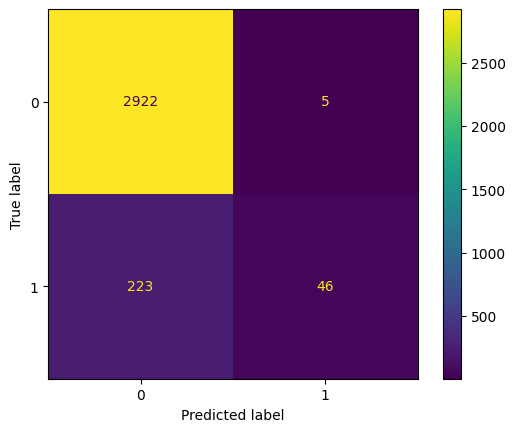

In [58]:
cm = confusion_matrix(y_test, y_pred_test_bin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [62]:
import numpy as np

# Assuming you have your training data in X_train and the corresponding labels in y_train

# Convert labels to NumPy array if necessary
y_train = np.array(y_train)

# Count occurrences of each class
class_counts = np.bincount(y_train)

# Assuming class 0 is represented by label 0 and class 1 is represented by label 1
count_class_0 = class_counts[0]
count_class_1 = class_counts[1]

print("Number of samples in class 0:", count_class_0)
print("Number of samples in class 1:", count_class_1)


Number of samples in class 0: 9391
Number of samples in class 1: 836


In [63]:
import numpy as np

# Assuming you have your testing data in X_test and the corresponding labels in y_test

# Convert labels to NumPy array if necessary
y_test = np.array(y_test)

# Count occurrences of each class
class_counts = np.bincount(y_test)

# Assuming class 0 is represented by label 0 and class 1 is represented by label 1
count_class_0 = class_counts[0]
count_class_1 = class_counts[1]

print("Number of samples in class 0:", count_class_0)
print("Number of samples in class 1:", count_class_1)


Number of samples in class 0: 2927
Number of samples in class 1: 269


100/100 [==============================] - 0s 4ms/step


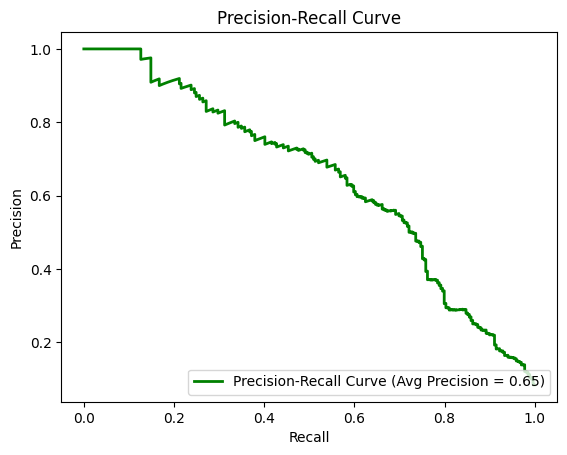

In [59]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Obtain predictions on the test data
y_pred_test = model_fold_04.predict(X_test_reshaped)
y_pred_test_bin = (y_pred_test > 0.5).astype(int)

# Calculate precision, recall, and thresholds for precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test)

# Calculate the average precision score
avg_precision = average_precision_score(y_test, y_pred_test)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall Curve (Avg Precision = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


100/100 [==============================] - 0s 4ms/step


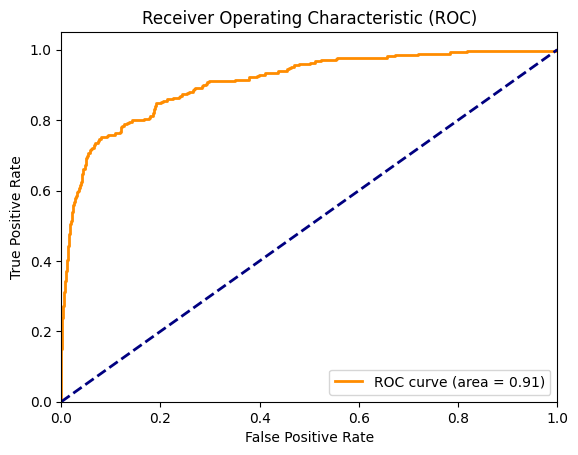

In [60]:
from sklearn.metrics import roc_curve, auc

# Obtain predictions on the test data
y_pred_test = model_fold_04.predict(X_test_reshaped)
y_pred_test_bin = (y_pred_test > 0.5).astype(int)

# Calculate false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [61]:
# Save the model
model_fold_04.save("/content/drive/MyDrive/Hanna/imbalanced_model_fold_04.h5")
